# Linear Regression

In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display max columns, max rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [104]:
# importing linear regression modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [34]:
# reading data
data_df = pd.read_csv("Linear_Regression.csv")

In [35]:
data_df.head()

,Brand,Mileage,Engine_Size,Price
0,1,289944,4.2,8501
1,2,5356,2.0,12092
2,3,231440,4.2,11171
3,4,160971,2.0,11780
4,5,286618,2.6,2867


<Axes: xlabel='Mileage', ylabel='Count'>

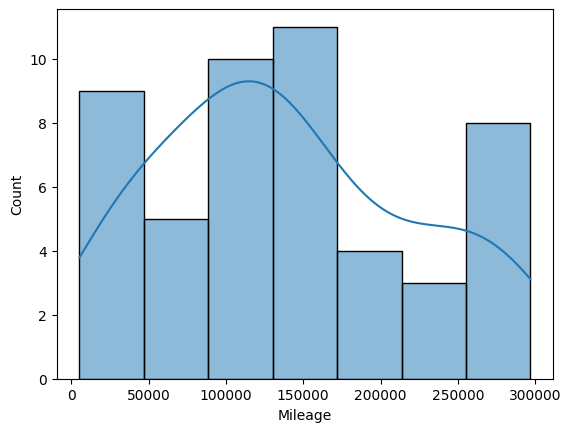

In [36]:
sns.histplot(data=data_df, x="Mileage", kde=True)

<Axes: xlabel='Engine_Size', ylabel='Count'>

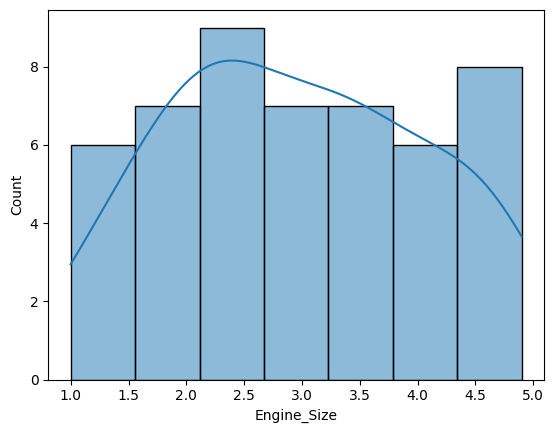

In [37]:
sns.histplot(data=data_df, x="Engine_Size", kde=True)

<Axes: xlabel='Brand', ylabel='Count'>

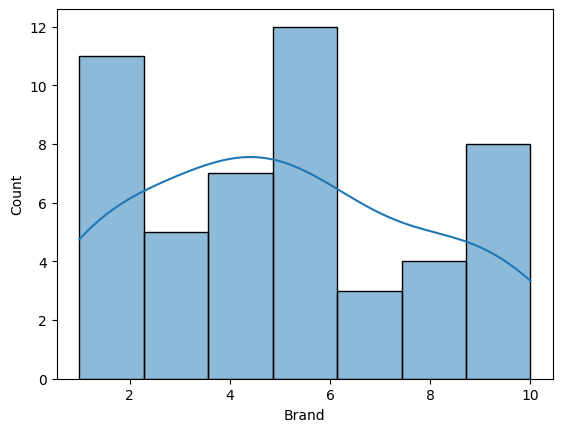

In [38]:
sns.histplot(data=data_df, x="Brand", kde=True)

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        50 non-null     int64  
 1   Mileage      50 non-null     int64  
 2   Engine_Size  50 non-null     float64
 3   Price        50 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 KB


In [40]:
# Standardizing the data
scaller = MinMaxScaler()
data_df[['Mileage', 'Engine_Size']] = scaller.fit_transform(data_df[['Mileage', 'Engine_Size']])

In [41]:
x = data_df.drop('Price', axis=1)
y = data_df['Price']

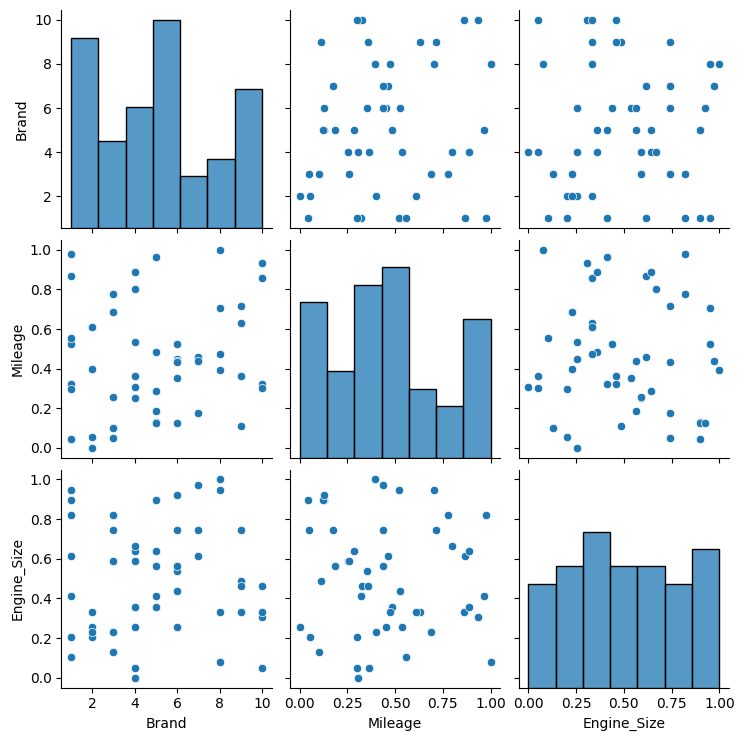

In [42]:
sns.pairplot(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Linear Model

In [44]:
x_train_lm = sm.add_constant(x_train[x_train.columns])

In [49]:
lr = sm.OLS(y_train, x_train_lm).fit()
print(lr.params)
print(lr.summary())

const          10475.859841
Brand           -124.299580
Mileage        -4886.552333
Engine_Size     2552.922968
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     5.232
Date:                Mon, 05 Jan 2026   Prob (F-statistic):            0.00487
Time:                        21:56:58   Log-Likelihood:                -320.03
No. Observations:                  35   AIC:                             648.1
Df Residuals:                      31   BIC:                             654.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---

### Residual Analysis

In [46]:
y_train_pred = lr.predict(x_train_lm)

Text(0.5, 0, 'Error')

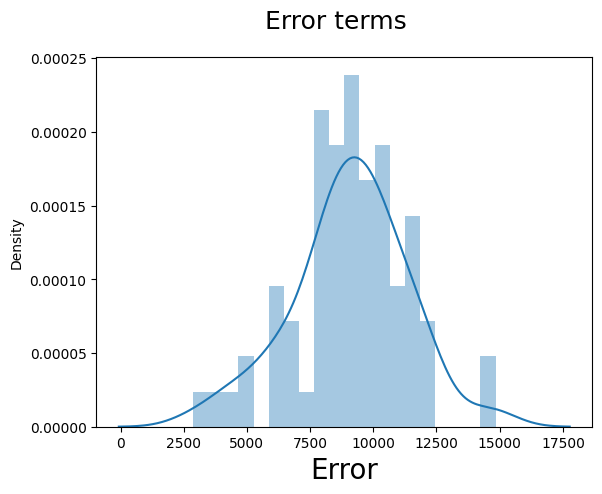

In [48]:
fig = plt.figure()
sns.distplot((y_train, y_train_pred), bins=20)
fig.suptitle("Error terms", fontsize=18)
plt.xlabel("Error", fontsize=20)

### VIF

In [52]:
VIF = pd.DataFrame()
VIF['Features'] = x_train.columns
VIF['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending=False)
VIF

,Features,VIF
0,Brand,3.38
1,Mileage,2.82
2,Engine_Size,2.49


### Model Evaluation

In [59]:
x_test_lm = sm.add_constant(x_test[x_test.columns])
y_test_pred = lr.predict(x_test_lm)

Text(0, 0.5, 'y_test_pred')

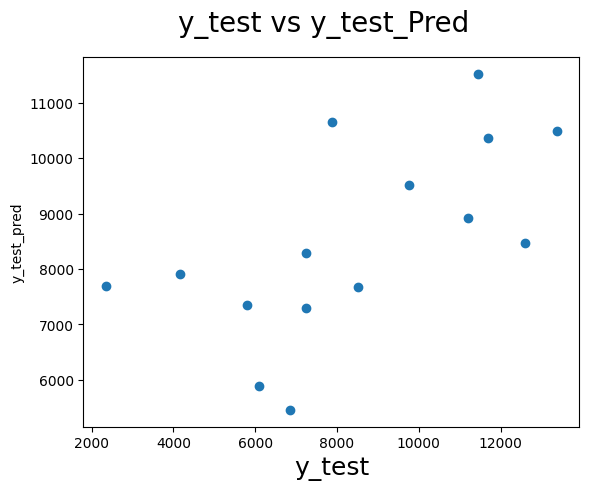

In [60]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle("y_test vs y_test_Pred", fontsize=20)
plt.xlabel("y_test", fontsize=18)
plt.ylabel("y_test_pred", fontsize=10)

In [61]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

2434.173673054188

In [62]:
r2_score(y_test, y_test_pred)

0.3835107150174676

### Gradient decent

In [64]:
def compute_cost(x,y, theta):
    return np.sum(np.square(np.matmul(x, theta) - y))/(2*len(y))

In [69]:
def gradient_decent(x,y, theta, alpha, iterations):
    theta = np.zeros(x.shape[1])
    m = len(x)
    gdm_df = pd.DataFrame(columns=['Betas', 'Cost'])
    for i in range(iterations):
        gradient = (1/m)* np.matmul(x.T, np.matmul(x, theta)-y)
        theta = theta - alpha * gradient
        cost = compute_cost(x,y, theta)
        gdm_df.loc[i] = [theta, cost]
    return gdm_df
    

In [70]:
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iterations = 1000

In [86]:
gradient_df = gradient_decent(x_train_lm,y_train, theta, alpha, iterations).reset_index()

<Axes: xlabel='index'>

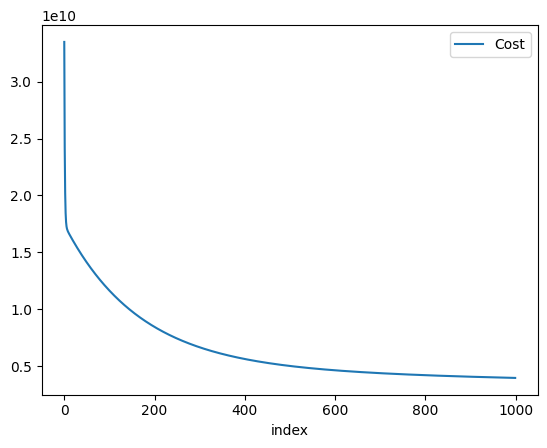

In [87]:
gradient_df.plot.line(x='index', y='Cost')

In [88]:
gradient_df.head()

,index,Betas,Cost
0,0,const 90.650571 Brand 448.8...,3.347832e+10
1,1,const 157.076138 Brand 740.6...,2.421249e+10
2,2,const 207.645942 Brand 929.9...,2.020991e+10
3,3,const 247.830749 Brand 1052...,1.845648e+10
4,4,const 281.206685 Brand 1130...,1.766433e+10


### Linear Regression

In [76]:
lm = LinearRegression()
rfe = RFE(lm)
rfe = rfe.fit(x_train, y_train)

In [77]:
rfe.support_

array([False,  True, False])

In [78]:
rfe.ranking_

array([3, 1, 2])

### K-Fold CV

In [89]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train_lm, y_train, scoring='r2', cv=3)
print(scores)
folds = KFold(n_splits=3, shuffle=True, random_state=100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
print(scores)

[-0.01182634  0.17061774 -0.17170171]
[ 0.04776208  0.31998015 -0.03818597]


In [91]:
scores = cross_val_score(lm, x_train_lm, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores)

[-7914319.55820065 -5058881.86868462 -5550000.41139897]


### Lasso

In [93]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)
lasso=Lasso()
param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                      9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = GridSearchCV(estimator=lasso, 
                        param_grid = param_grid, 
                        return_train_score=True, 
                        scoring='neg_mean_absolute_error',
                        cv=folds, 
                        verbose=1)
model_cv.fit(x_train_lm, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 3 folds for each of 28 candidates, totalling 84 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004999,6.910941e-06,0.003013,0.000831,0.0001,{'alpha': 0.0001},-2037.094460,-1907.219301,-2324.369355,-2089.561039,174.294957,26,-1754.967535,-1783.333776,-1792.883642,-1777.061651,16.102018
1,0.005669,2.357133e-03,0.005927,0.004861,0.0010,{'alpha': 0.001},-2037.093634,-1907.220016,-2324.368268,-2089.560639,174.294303,25,-1754.967109,-1783.333140,-1792.883061,-1777.061103,16.101940
2,0.007069,3.658648e-03,0.005002,0.002160,0.0100,{'alpha': 0.01},-2037.085742,-1907.227183,-2324.357401,-2089.556775,174.287715,24,-1754.962893,-1783.326767,-1792.877288,-1777.055649,16.101150
3,0.002999,9.602742e-07,0.002000,0.000001,0.0500,{'alpha': 0.05},-2037.048597,-1907.258968,-2324.313405,-2089.540323,174.260603,23,-1754.943869,-1783.298508,-1792.853635,-1777.032004,16.098435
4,0.004886,6.311586e-04,0.002719,0.000909,0.1000,{'alpha': 0.1},-2037.004754,-1907.298786,-2324.253148,-2089.518896,174.224063,22,-1754.920444,-1783.263098,-1792.821411,-1777.001651,16.093997


In [94]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     float64
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   mean_test_score     28 non-null     float64
 10  std_test_score      28 non-null     float64
 11  rank_test_score     28 non-null     int32  
 12  split0_train_score  28 non-null     float64
 13  split1_train_score  28 non-null     float64
 14  split2_train_score  28 non-null     float64
 15  mean_train_score    28 non-null     float64
 16  std_train_

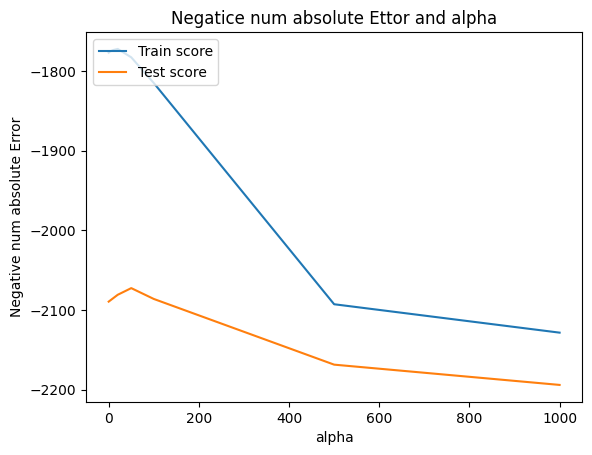

In [98]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative num absolute Error')
plt.title("Negatice num absolute Ettor and alpha")
plt.legend(['Train score', 'Test score'], loc="upper left")
plt.show()

In [99]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(x_train_lm, y_train)
lasso.coef_

array([    0.        ,  -133.00042468, -3503.23902536,  1492.21061173])

### Ridge

In [100]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)
ridge=Ridge()
param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                      9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid = param_grid, 
                        return_train_score=True, 
                        scoring='neg_mean_absolute_error',
                        cv=folds, 
                        verbose=1)
model_cv.fit(x_train_lm, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 3 folds for each of 28 candidates, totalling 84 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.095671,0.128228,0.002677,0.000937,0.0001,{'alpha': 0.0001},-2037.082223,-1907.227906,-2324.343142,-2089.551091,174.281414,19,-1754.957584,-1783.324418,-1792.878811,-1777.053605,16.103772
1,0.003350,0.000466,0.001989,0.000014,0.0010,{'alpha': 0.001},-2036.971352,-1907.306035,-2324.106270,-2089.461219,174.158929,18,-1754.867695,-1783.239599,-1792.834762,-1776.980685,16.119451
2,0.004703,0.002331,0.003678,0.002345,0.0100,{'alpha': 0.01},-2035.868075,-1908.084370,-2321.750008,-2088.567484,172.940714,17,-1753.977524,-1782.395210,-1792.395041,-1776.255925,16.273589
3,0.004002,0.000818,0.002666,0.000942,0.0500,{'alpha': 0.05},-2031.082043,-1911.479598,-2311.544487,-2084.702043,167.668934,15,-1756.739572,-1778.724311,-1790.458141,-1775.307342,13.975985
4,0.003329,0.000474,0.002333,0.000472,0.1000,{'alpha': 0.1},-2025.359065,-1915.581135,-2299.368659,-2080.102953,161.391627,13,-1760.491028,-1774.315909,-1789.019231,-1774.608723,11.648430


In [101]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     float64
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   mean_test_score     28 non-null     float64
 10  std_test_score      28 non-null     float64
 11  rank_test_score     28 non-null     int32  
 12  split0_train_score  28 non-null     float64
 13  split1_train_score  28 non-null     float64
 14  split2_train_score  28 non-null     float64
 15  mean_train_score    28 non-null     float64
 16  std_train_

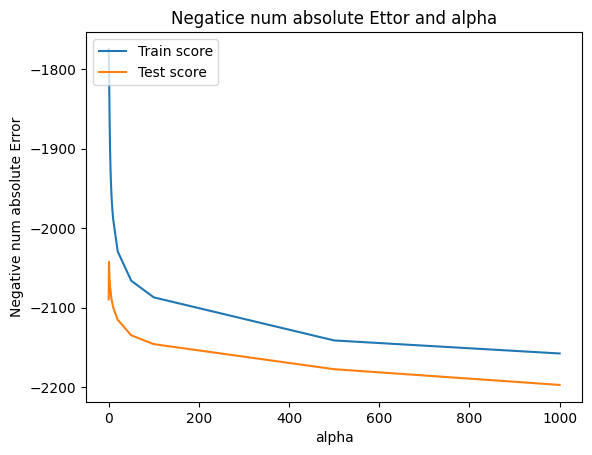

In [102]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative num absolute Error')
plt.title("Negatice num absolute Ettor and alpha")
plt.legend(['Train score', 'Test score'], loc="upper left")
plt.show()

In [103]:
alpha = 15
ridge = Ridge(alpha=alpha)
ridge.fit(x_train_lm, y_train)
ridge.coef_

array([   0.        , -179.72610914, -678.52909951,  484.96261327])

### ElasticNet

In [105]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)
elastic_net=ElasticNet()
param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                      9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = GridSearchCV(estimator=elastic_net, 
                        param_grid = param_grid, 
                        return_train_score=True, 
                        scoring='neg_mean_absolute_error',
                        cv=folds, 
                        verbose=1)
model_cv.fit(x_train_lm, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 3 folds for each of 28 candidates, totalling 84 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004668,0.000943,0.002999,0.000818,0.0001,{'alpha': 0.0001},-2036.952839,-1907.319091,-2324.053603,-2089.441844,174.132584,9,-1754.852705,-1783.225433,-1792.824943,-1776.967694,16.121253
1,0.003664,0.000945,0.003014,0.000831,0.0010,{'alpha': 0.001},-2035.684681,-1908.213967,-2321.228850,-2088.375833,172.680035,8,-1753.830451,-1782.254796,-1792.297197,-1776.127482,16.290705
2,0.005332,0.001701,0.003655,0.000488,0.0100,{'alpha': 0.01},-2023.692007,-1916.785497,-2294.663172,-2078.380226,159.040844,5,-1761.575784,-1773.027378,-1790.061609,-1774.888257,11.703495
3,0.008332,0.004783,0.003670,0.001242,0.0500,{'alpha': 0.05},-1982.523791,-1959.849818,-2204.529686,-2048.967765,110.387682,1,-1787.433749,-1789.367555,-1809.082983,-1795.294762,9.781656
4,0.004722,0.001309,0.002668,0.001701,0.1000,{'alpha': 0.1},-2014.150166,-2005.512303,-2131.103958,-2050.255476,57.277168,2,-1818.692896,-1821.377272,-1823.254881,-1821.108350,1.872105


In [106]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     float64
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   mean_test_score     28 non-null     float64
 10  std_test_score      28 non-null     float64
 11  rank_test_score     28 non-null     int32  
 12  split0_train_score  28 non-null     float64
 13  split1_train_score  28 non-null     float64
 14  split2_train_score  28 non-null     float64
 15  mean_train_score    28 non-null     float64
 16  std_train_

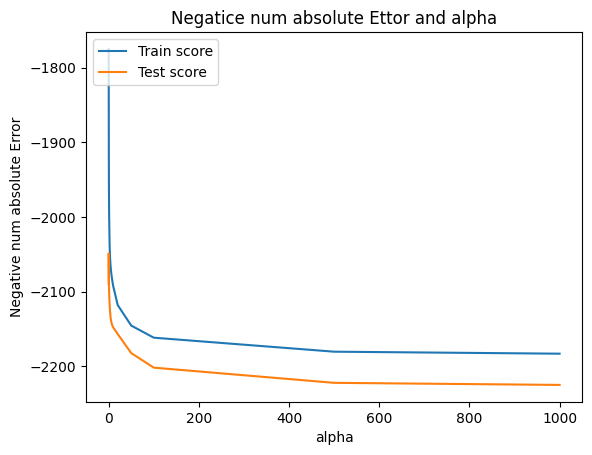

In [107]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative num absolute Error')
plt.title("Negatice num absolute Ettor and alpha")
plt.legend(['Train score', 'Test score'], loc="upper left")
plt.show()

In [108]:
alpha = 15
ridge = ElasticNet(alpha=alpha)
ridge.fit(x_train_lm, y_train)
ridge.coef_

array([  0.        , -98.71393848, -45.0773278 ,  32.58766467])

In [109]:
alpha = 100
ridge = ElasticNet(alpha=alpha)
ridge.fit(x_train_lm, y_train)
ridge.coef_

array([  0.        , -24.91057162,  -6.12942976,   4.11023386])